In [95]:
%pylab inline
import matplotlib.pylab as plt
import numpy as np
import scipy.misc
import pickle

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [96]:
nodrop_prob = np.load('./exps/exp1/results/plus_fbnodrop_prob.npy')
alldrop_prob_std = np.load('./exps/exp1/results/plus_fballdrop_prob.npy')
fcdrup_prob_std = np.load('./exps/exp1/results/plus_fbnodrop_prob.npy')
img_adv_all  = np.load('./exps/exp1/results/plus_fbimg_adv.npy')

print nodrop_prob.shape
print img_adv_all.shape


(100, 2, 10)
(100, 2, 3, 32, 32)


In [7]:
img_adv = img_adv_all[:,1,:,:,:]

grid = np.zeros((3,10*32,10*32))
print grid.shape
for i in xrange(100):
    r = i/10
    c = i%10
    r_p = np.array([x for x in xrange(r*32,(r+1)*32)])
    c_p = np.array([y for y in xrange(c*32,(c+1)*32)])
    for x,ix in zip(r_p,np.arange(32)):
        for y,iy in zip(c_p,np.arange(32)):
            grid[:,x,y] = img_adv[i,:,ix,iy]
            

scipy.misc.imsave('after.jpg',np.rot90(grid.T,k=3))

(3, 320, 320)


In [108]:
nodrop_prob = np.load('./exps/exp1/results/plus_fbnodrop_prob.npy')
alldrop_prob_mc = np.load('./exps/exp1/results/plus_fballdrop_prob.npy')
fcdrop_prob_mc = np.load('./exps/exp1/results/plus_fbfcdrop_prob.npy')
alldrop_prob_std = np.load('./exps/exp1/results/plus_fballdrop_ap_prob.npy')
fcdrop_prob_std = np.load('./exps/exp1/results/plus_fbfcdrop_ap_prob.npy')
yt = np.load('./exps/exp1/results/yt_fb.npy')

n1 = [np.sum(alldrop_prob_std[i,0,:]) for i in xrange(yt_fb.shape[0])]
for i in xrange(yt_fb.shape[0]):
    alldrop_prob_std[i,0,:]/=n1[i]
    


In [109]:


print alldrop_prob_mc.shape
corr_no = np.array([nodrop_prob[i,0,yt[i]] for i in xrange(yt_fb.shape[0])])
corr_all = np.array([alldrop_prob_std[i,0,yt[i]] for i in xrange(yt_fb.shape[0])])
corr_fc = np.array([fcdrop_prob_std[i,0,yt[i]] for i in xrange(yt_fb.shape[0])])
corr_all_mc = np.array([np.mean(alldrop_prob_mc[i,0,:,yt[i]]) for i in xrange(yt_fb.shape[0])])
corr_fc_mc = np.array([np.mean(fcdrop_prob_mc[i,0,:,yt[i]]) for i in xrange(yt_fb.shape[0])])

icorr_no = np.array([nodrop_prob[i,1,yt[i]] for i in xrange(yt_fb.shape[0])])
icorr_all = np.array([alldrop_prob_std[i,1,yt[i]] for i in xrange(yt_fb.shape[0])])
icorr_fc = np.array([fcdrop_prob_std[i,1,yt[i]] for i in xrange(yt_fb.shape[0])])
icorr_all_mc = np.array([np.mean(alldrop_prob_mc[i,1,:,yt[i]]) for i in xrange(yt_fb.shape[0])])
icorr_fc_mc = np.array([np.mean(fcdrop_prob_mc[i,1,:,yt[i]]) for i in xrange(yt_fb.shape[0])])

mean_corrs = [np.mean(corr_no), np.mean(corr_all), np.mean(corr_fc), np.mean(corr_all_mc), np.mean(corr_fc_mc)]
std_corrs = [[2*np.std(corr_no), 2*np.std(corr_all), 2*np.std(corr_fc), 2*np.std(corr_all), 2*np.std(corr_fc)],\
            [1,1,1,1,1]]

mean_icorrs = [np.mean(icorr_no), np.mean(icorr_all), np.mean(icorr_fc), np.mean(icorr_all_mc), np.mean(icorr_fc_mc)]
std_icorrs =[(0,0,0,0,0),\
             [2*np.std(icorr_no), 2*np.std(icorr_all), 2*np.std(icorr_fc), 2*np.std(icorr_all_mc), 2*np.std(icorr_fc_mc)]]



N = 5

(100, 2, 100, 10)


In [110]:
mean_corrs = [np.mean(corr_no), np.mean(corr_all), np.mean(corr_fc), np.mean(corr_all_mc), np.mean(corr_fc_mc)]
mean_icorrs = [np.mean(icorr_no), np.mean(icorr_all), np.mean(icorr_fc), np.mean(icorr_all_mc), np.mean(icorr_fc_mc)]
std_corrs_min = [np.min(corr_no), np.min(corr_all), np.min(corr_fc), np.min(corr_all), np.min(corr_fc)]
std_corrs_max = [np.max(corr_no), np.max(corr_all), np.max(corr_fc), np.max(corr_all), np.max(corr_fc)]

std_icorrs_min = [np.min(icorr_no), np.min(icorr_all), np.min(icorr_fc), np.min(icorr_all), np.min(icorr_fc)]
std_icorrs_max = [np.max(icorr_no), np.max(icorr_all), np.max(icorr_fc), np.max(icorr_all), np.max(icorr_fc)]



In [112]:
print std_corrs_min
print yt



[0.0051394645124673843, 2.9611884933693493e-06, 0.014903395436704159, 2.9611884933693493e-06, 0.014903395436704159]
[2 7 3 0 1 8 8 3 4 8 9 8 8 9 9 9 6 0 8 7 0 8 8 8 8 1 4 3 4 8 0 1 8 3 9 8 1
 7 2 8 3 0 2 0 2 0 8 0 8 8 1 3 9 8 8 3 3 8 0 5 0 9 8 8 3 3 4 0 2 5 5 9 8 3
 0 5 8 8 1 8 8 8 0 6 1 3 3 3 3 8 6 8 1 8 8 8 5 7 0 5]


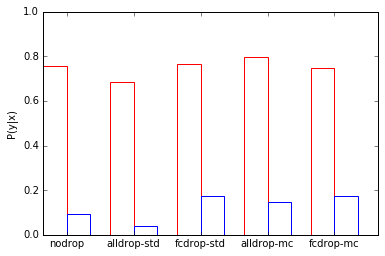

In [151]:

## necessary variables
ind = np.arange(5)                # the x locations for the groups
width = 0.35 # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

## the data
N = 5
menMeans = mean_corrs
menStd =   std_corrs
womenMeans = mean_icorrs
womenStd =   std_icorrs



## the bars
rects1 = ax.bar(ind, menMeans, width,
                color='none',edgecolor='r',
                error_kw=dict(elinewidth=2,ecolor='red'))

rects2 = ax.bar(ind+width, womenMeans, width,
                    color='none',edgecolor='b',
                    error_kw=dict(elinewidth=2,ecolor='blue'))

# axes and labels
#ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0.0,1.0)
ax.set_ylabel('P(y|x)')
xTickMarks = ['nodrop','alldrop-std','fcdrop-std','alldrop-mc','fcdrop-mc']
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=0, fontsize=10)

## add a legend
#ax.legend( (rects1[0], rects2[0]), ('x', 'Adv(x)') )
savefig('avgperf.png', bbox_inches='tight')
plt.show()

(100, 2, 100, 10)
Yoda
(100, 2, 100, 10)
Yoda


<function matplotlib.pyplot.show>

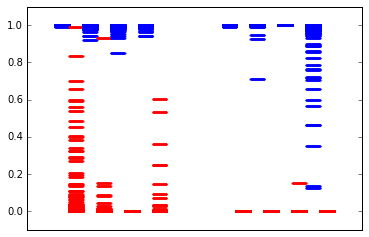

In [150]:
fcdrop_prob_mc = np.load('./exps/exp1/results/plus_fbfcdrop_prob.npy')
yt = np.load('./exps/exp1/results/yt_fb.npy')

print fcdrop_prob_mc.shape

plt.hold(True)
indices = np.array([18,5,10,63])
img_idx = 13
tr_idx = (yt[img_idx]+0)%10

print 'Yoda'
#label_idx = yt_adv[img_idx] 
for j in xrange(indices.shape[0]):
    img_idx = indices[j]
    tr_idx = (yt[img_idx]+0)%10

    for i in xrange(100):
        x_ = (j*100+i)*np.ones(fcdrop_prob_mc.shape[2])
        if i < 50:
            plt.scatter(x_,fcdrop_prob_mc[img_idx,0,:,tr_idx],color='b',s=1)
        else:
            plt.scatter(x_,fcdrop_prob_mc[img_idx,1,:,tr_idx],color='r',s=1)

fcdrop_prob_mc = np.load('./exps/exp1/results/plus_fballdrop_prob.npy')
yt = np.load('./exps/exp1/results/yt_fb.npy')

print fcdrop_prob_mc.shape

plt.hold(True)
indices = np.array([18,5,10, 63])
img_idx = 13
tr_idx = (yt[img_idx]+0)%10

print 'Yoda'
#label_idx = yt_adv[img_idx] 
for j in xrange(indices.shape[0]):
    img_idx = indices[j]
    tr_idx = (yt[img_idx]+0)%10

    for i in xrange(100):
        x_ = (j*100+600+i)*np.ones(fcdrop_prob_mc.shape[2])
        if i < 50:
            plt.scatter(x_,fcdrop_prob_mc[img_idx,0,:,tr_idx],color='b',s=1)
        else:
            plt.scatter(x_,fcdrop_prob_mc[img_idx,1,:,tr_idx],color='r',s=1)            

plt.xlim([-100,1100])
plt.ylim([-0.1,1.1])
frame1 = plt.gca()    
frame1.axes.get_xaxis().set_visible(False)
#plt.savefig('./results/img_'+str(img_idx)+'_lab_ori.jpeg')
#plt.savefig('./results/img_'+str(img_idx)+'_lab_adv.jpeg')
savefig('scatter.png', bbox_inches='tight')

plt.show

(1, 200, 100, 10)
Yoda


<function matplotlib.pyplot.show>

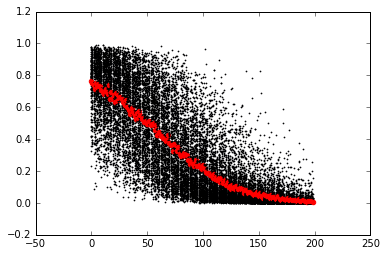

In [201]:
fcdrop_prob_mc = np.load('./exps/exp1/results/splus_fbfcdrop_prob.npy')

yt = np.load('./exps/exp1/results/yt_sfb.npy')

print fcdrop_prob_mc.shape

plt.hold(True)

img_idx = 0
tr_idx = (yt[img_idx]+0)%10

print 'Yoda'
#label_idx = yt_adv[img_idx] 
for i in xrange(200):
        plt.scatter(i*np.ones(fcdrop_prob_mc.shape[2]),fcdrop_prob_mc[img_idx,i,:,tr_idx],s=0.5,c='b')
        m = np.mean(fcdrop_prob_mc[img_idx,i,:,tr_idx])
        plt.scatter(i,m,color='r')

#plt.savefig('./results/img_'+str(img_idx)+'_lab_ori.jpeg')
#plt.savefig('./results/img_'+str(img_idx)+'_lab_adv.jpeg')

plt.show


In [64]:
stds    = [(0,0,0,0), [4.59,4.39,4.37,4.38]]

In [158]:
indices = np.array([18,5,10,63])

nodrop_prob = np.load('./exps/exp1/results/plus_fbnodrop_prob.npy')
alldrop_prob_mc = np.load('./exps/exp1/results/plus_fballdrop_prob.npy')
fcdrop_prob_mc = np.load('./exps/exp1/results/plus_fbfcdrop_prob.npy')
alldrop_prob_std = np.load('./exps/exp1/results/plus_fballdrop_ap_prob.npy')
fcdrop_prob_std = np.load('./exps/exp1/results/plus_fbfcdrop_ap_prob.npy')
yt = np.load('./exps/exp1/results/yt_fb.npy')

img_adv_all  = np.load('./exps/exp1/results/plus_fbimg_adv.npy')
print img_adv_all.shape

for idx in indices:
    print 'Image : ',idx
    print alldrop_prob_std[idx,0,yt[idx]]
    print fcdrop_prob_std[idx,0,yt[idx]]
    #%print nodrop_prob[idx,0,yt[idx]]
    #print nodrop_prob[idx,0,yt[idx]]

    grid = np.zeros((3,2*32,4*32))
    print grid.shape
    for i in xrange(8):
        r = i/10
        c = i%10
        r_p = np.array([x for x in xrange(r*32,(r+1)*32)])
        c_p = np.array([y for y in xrange(c*32,(c+1)*32)])
        for x,ix in zip(r_p,np.arange(32)):
            for y,iy in zip(c_p,np.arange(32)):
               grid[:,x,y] = img_adv_all[idx,i,:,ix,iy]
scipy.misc.imsave('test'+str(idx)+'.jpg',np.rot90(grid.T,k=3))

(100, 2, 3, 32, 32)
Image :  18
0.999982357025
0.999731481075
(3, 32, 64)
Image :  5
0.995088875294
0.996077954769
(3, 32, 64)
Image :  10
0.999606668949
0.996280372143
(3, 32, 64)
Image :  63
0.999701321125
0.998493075371
(3, 32, 64)


Yoda
(100, 2, 100, 10)
Yoda


<function matplotlib.pyplot.show>

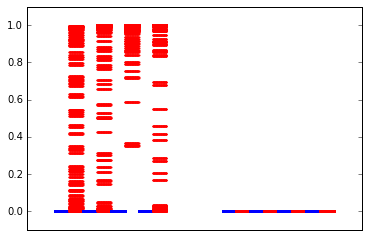

In [173]:
fcdrop_prob_mc = np.load('./exps/exp1/results/plus_fbfcdrop_prob.npy')
nodrop_prob = np.load('./exps/exp1/results/plus_fbnodrop_prob.npy')
indices = np.array([18,5,10,63])

r = np.array([np.argmax(nodrop_prob[idx,1,:]) for idx in xrange(nodrop_prob.shape[0])])
#yt = np.load('./exps/exp1/results/yt_fb.npy')

plt.hold(True)
indices = np.array([18,5,10,63])
img_idx = 13
tr_idx = (r[img_idx]+0)%10

print 'Yoda'
#label_idx = yt_adv[img_idx] 
for j in xrange(indices.shape[0]):
    img_idx = indices[j]
    tr_idx = (r[img_idx]+0)%10

    for i in xrange(100):
        x_ = (j*100+i)*np.ones(fcdrop_prob_mc.shape[2])
        if i < 50:
            plt.scatter(x_,fcdrop_prob_mc[img_idx,0,:,tr_idx],color='b',s=1)
        else:
            plt.scatter(x_,fcdrop_prob_mc[img_idx,1,:,tr_idx],color='r',s=1)

fcdrop_prob_mc = np.load('./exps/exp1/results/plus_fballdrop_prob.npy')
yt = np.load('./exps/exp1/results/yt_fb.npy')

print fcdrop_prob_mc.shape

plt.hold(True)
indices = np.array([18,5,10, 63])


print 'Yoda'
#label_idx = yt_adv[img_idx] 
for j in xrange(indices.shape[0]):
    img_idx = indices[j]
    tr_idx = (r[img_idx]+0)%10

    for i in xrange(100):
        x_ = (j*100+600+i)*np.ones(fcdrop_prob_mc.shape[2])
        if i < 50:
            plt.scatter(x_,fcdrop_prob_mc[img_idx,0,:,tr_idx],color='b',s=1)
        else:
            plt.scatter(x_,fcdrop_prob_mc[img_idx,1,:,tr_idx],color='r',s=1)            

plt.xlim([-100,1100])
plt.ylim([-0.1,1.1])
frame1 = plt.gca()    
frame1.axes.get_xaxis().set_visible(False)
#plt.savefig('./results/img_'+str(img_idx)+'_lab_ori.jpeg')
#plt.savefig('./results/img_'+str(img_idx)+'_lab_adv.jpeg')
savefig('scatter3.png', bbox_inches='tight')

plt.show

In [168]:
yt

array([2, 7, 3, 0, 1, 8, 8, 3, 4, 8, 9, 8, 8, 9, 9, 9, 6, 0, 8, 7, 0, 8, 8,
       8, 8, 1, 4, 3, 4, 8, 0, 1, 8, 3, 9, 8, 1, 7, 2, 8, 3, 0, 2, 0, 2, 0,
       8, 0, 8, 8, 1, 3, 9, 8, 8, 3, 3, 8, 0, 5, 0, 9, 8, 8, 3, 3, 4, 0, 2,
       5, 5, 9, 8, 3, 0, 5, 8, 8, 1, 8, 8, 8, 0, 6, 1, 3, 3, 3, 3, 8, 6, 8,
       1, 8, 8, 8, 5, 7, 0, 5])

In [170]:
(yt[0]+1)%100

3

In [192]:

img_adv = img_adv_all[0]

grid = np.zeros((3,10*32,10*32))
print grid.shape
for i in xrange(100):
    r = i/10
    c = i%10
    r_p = np.array([x for x in xrange(r*32,(r+1)*32)])
    c_p = np.array([y for y in xrange(c*32,(c+1)*32)])
    for x,ix in zip(r_p,np.arange(32)):
        for y,iy in zip(c_p,np.arange(32)):
            grid[:,x,y] = img_adv[i,:,ix,iy]
            

scipy.misc.imsave('slow.jpg',np.rot90(grid.T,k=3))

(3, 320, 320)


[8]
(1, 200, 100, 10)
Yoda


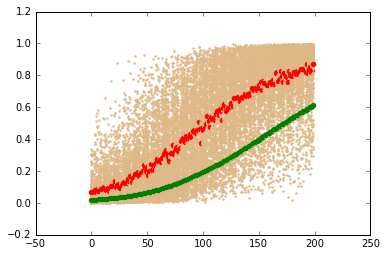

In [282]:
fcdrop_prob_mc = np.load('./exps/exp1/results/splus_fbfcdrop_prob.npy')
nodrop_prob = np.load('./exps/exp1/results/splus_fbnodrop_prob.npy')
fcdrop_prob_mc = fcdrop_prob_mc[0,None]


yt = np.load('./exps/exp1/results/yt_sfb_noise.npy')[0,None]

print yt
print fcdrop_prob_mc.shape

plt.hold(True)

img_idx = 0
tr_idx = 9 

print 'Yoda'
#label_idx = yt_adv[img_idx] 
for i in xrange(200):
        plt.scatter(i*np.ones(fcdrop_prob_mc.shape[2]),fcdrop_prob_mc[img_idx,i,:,tr_idx],color ='#DEB887', s=2)
        m = np.mean(fcdrop_prob_mc[img_idx,i,:,tr_idx])
        plt.scatter(i,m,color='r')
        plt.scatter(i,nodrop_prob[img_idx,i,tr_idx],color='g')
        

        
savefig('fcdrop.png', bbox_inches='tight')



In [227]:
img_adv1 = np.load('./exps/exp1/results/sminus_noise_fbimg_adv.npy')
img_adv2 = np.load('./exps/exp1/results/s2minus_noise_fbimg_adv.npy')

np.linalg.norm(img_adv1-img_adv2)

4506557.297986133

[8]
(1, 200, 100, 10)
Yoda
[8]
(1, 200, 100, 10)
Yoda
[8]
(1, 200, 100, 10)
Yoda
[8]
(1, 200, 100, 10)
Yoda


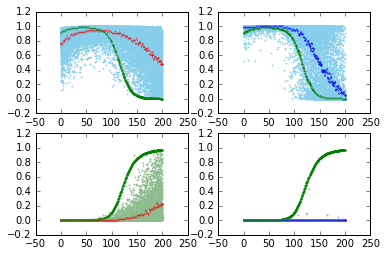

In [380]:
plt.hold(True)
plt.subplot(2,2,1)

fcdrop_prob_mc = np.load('./exps/exp1/results/slowfp_fbfcdrop_prob.npy')
nodrop_prob = np.load('./exps/exp1/results/slowfp_fbnodrop_prob.npy')
fcdrop_prob_mc = fcdrop_prob_mc[0,None]

print yt
print fcdrop_prob_mc.shape


img_idx = 0
tr_idx = 8 

print 'Yoda'
#label_idx = yt_adv[img_idx] 
for i in xrange(200):
        plt.scatter(i*np.ones(fcdrop_prob_mc.shape[2]),fcdrop_prob_mc[img_idx,i,:,tr_idx],color ='#87CEEB', s=0.5)
        m = np.mean(fcdrop_prob_mc[img_idx,i,:,tr_idx])
        plt.scatter(i,m,color='r',s=2)
        plt.scatter(i,nodrop_prob[img_idx,i,tr_idx],color='g',s=2)
        

        
plt.subplot(2,2,2)

fcdrop_prob_mc = np.load('./exps/exp1/results/slowfp_fballdrop_prob.npy')
nodrop_prob = np.load('./exps/exp1/results/slowfp_fbnodrop_prob.npy')
fcdrop_prob_mc = fcdrop_prob_mc[0,None]

print yt
print fcdrop_prob_mc.shape


img_idx = 0
tr_idx = 8 

print 'Yoda'
#label_idx = yt_adv[img_idx] 
for i in xrange(200):
        plt.scatter(i*np.ones(fcdrop_prob_mc.shape[2]),fcdrop_prob_mc[img_idx,i,:,tr_idx],color ='#87CEEB', s=0.5)
        m = np.mean(fcdrop_prob_mc[img_idx,i,:,tr_idx])
        plt.scatter(i,m,color='b',s=2)
        plt.scatter(i,nodrop_prob[img_idx,i,tr_idx],color='g',s=2)

plt.subplot(2,2,3)

fcdrop_prob_mc = np.load('./exps/exp1/results/slowfp_fbfcdrop_prob.npy')
nodrop_prob = np.load('./exps/exp1/results/slowfp_fbnodrop_prob.npy')
fcdrop_prob_mc = fcdrop_prob_mc[0,None]

print yt
print fcdrop_prob_mc.shape


img_idx = 0
tr_idx = 4 

print 'Yoda'
#label_idx = yt_adv[img_idx] 
for i in xrange(200):
        plt.scatter(i*np.ones(fcdrop_prob_mc.shape[2]),fcdrop_prob_mc[img_idx,i,:,tr_idx],color ='#8FBC8F', s=0.5)
        m = np.mean(fcdrop_prob_mc[img_idx,i,:,tr_idx])
        plt.scatter(i,m,color='r',s=2)
        plt.scatter(i,nodrop_prob[img_idx,i,tr_idx],color='g',s=2)
        

        
plt.subplot(2,2,4)

fcdrop_prob_mc = np.load('./exps/exp1/results/slowfp_fballdrop_prob.npy')
nodrop_prob = np.load('./exps/exp1/results/slowfp_fbnodrop_prob.npy')
fcdrop_prob_mc = fcdrop_prob_mc[0,None]

print yt
print fcdrop_prob_mc.shape


img_idx = 0
tr_idx = 4 

print 'Yoda'
#label_idx = yt_adv[img_idx] 
for i in xrange(200):
        plt.scatter(i*np.ones(fcdrop_prob_mc.shape[2]),fcdrop_prob_mc[img_idx,i,:,tr_idx],color ='#8FBC8F', s=0.5)
        m = np.mean(fcdrop_prob_mc[img_idx,i,:,tr_idx])
        plt.scatter(i,m,color='b',s=2)
        plt.scatter(i,nodrop_prob[img_idx,i,tr_idx],color='g',s=2)

savefig('iter_bird.png', bbox_inches='tight')



[8]
(1, 200, 100, 10)
Yoda
[8]
(1, 200, 100, 10)
Yoda
[8]
(1, 200, 100, 10)
Yoda
[8]
(1, 200, 100, 10)
Yoda


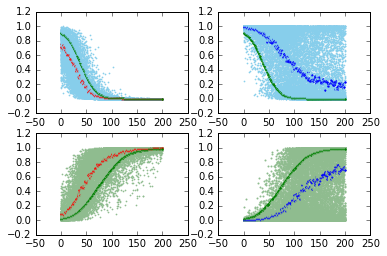

In [363]:
plt.hold(True)
plt.subplot(2,2,1)

fcdrop_prob_mc = np.load('./exps/exp1/results/slow_in_fp_fbfcdrop_prob.npy')
nodrop_prob = np.load('./exps/exp1/results/slow_in_fp_fbnodrop_prob.npy')
fcdrop_prob_mc = fcdrop_prob_mc[0,None]

print yt
print fcdrop_prob_mc.shape


img_idx = 0
tr_idx = 8 

print 'Yoda'
#label_idx = yt_adv[img_idx] 
for i in xrange(200):
        plt.scatter(i*np.ones(fcdrop_prob_mc.shape[2]),fcdrop_prob_mc[img_idx,i,:,tr_idx],color ='#87CEEB', s=0.5)
        m = np.mean(fcdrop_prob_mc[img_idx,i,:,tr_idx])
        plt.scatter(i,m,color='r',s=2)
        plt.scatter(i,nodrop_prob[img_idx,i,tr_idx],color='g',s=2)
        

        
plt.subplot(2,2,2)

fcdrop_prob_mc = np.load('./exps/exp1/results/slow_in_fp_fballdrop_prob.npy')
nodrop_prob = np.load('./exps/exp1/results/slow_in_fp_fbnodrop_prob.npy')
fcdrop_prob_mc = fcdrop_prob_mc[0,None]

print yt
print fcdrop_prob_mc.shape


img_idx = 0
tr_idx = 8 

print 'Yoda'
#label_idx = yt_adv[img_idx] 
for i in xrange(200):
        plt.scatter(i*np.ones(fcdrop_prob_mc.shape[2]),fcdrop_prob_mc[img_idx,i,:,tr_idx],color ='#87CEEB', s=0.5)
        m = np.mean(fcdrop_prob_mc[img_idx,i,:,tr_idx])
        plt.scatter(i,m,color='b',s=2)
        plt.scatter(i,nodrop_prob[img_idx,i,tr_idx],color='g',s=2)

plt.subplot(2,2,3)

fcdrop_prob_mc = np.load('./exps/exp1/results/slow_in_fp_fbfcdrop_prob.npy')
nodrop_prob = np.load('./exps/exp1/results/slow_in_fp_fbnodrop_prob.npy')
fcdrop_prob_mc = fcdrop_prob_mc[0,None]

print yt
print fcdrop_prob_mc.shape


img_idx = 0
tr_idx = 9

print 'Yoda'
#label_idx = yt_adv[img_idx] 
for i in xrange(200):
        plt.scatter(i*np.ones(fcdrop_prob_mc.shape[2]),fcdrop_prob_mc[img_idx,i,:,tr_idx],color ='#8FBC8F', s=0.5)
        m = np.mean(fcdrop_prob_mc[img_idx,i,:,tr_idx])
        plt.scatter(i,m,color='r',s=2)
        plt.scatter(i,nodrop_prob[img_idx,i,tr_idx],color='g',s=2)
        


plt.subplot(2,2,4)

fcdrop_prob_mc = np.load('./exps/exp1/results/slow_in_fp_fballdrop_prob.npy')
nodrop_prob = np.load('./exps/exp1/results/slow_in_fp_fbnodrop_prob.npy')
fcdrop_prob_mc = fcdrop_prob_mc[0,None]

print yt
print fcdrop_prob_mc.shape


img_idx = 0
tr_idx = 9 

print 'Yoda'
#label_idx = yt_adv[img_idx] 
for i in xrange(200):
        plt.scatter(i*np.ones(fcdrop_prob_mc.shape[2]),fcdrop_prob_mc[img_idx,i,:,tr_idx],color ='#8FBC8F', s=1.0)
        m = np.mean(fcdrop_prob_mc[img_idx,i,:,tr_idx])
        plt.scatter(i,m,color='b',s=2)
        plt.scatter(i,nodrop_prob[img_idx,i,tr_idx],color='g',s=2)
        

savefig('iter_truck.png', bbox_inches='tight')


[8]
(1, 200, 100, 10)
Yoda


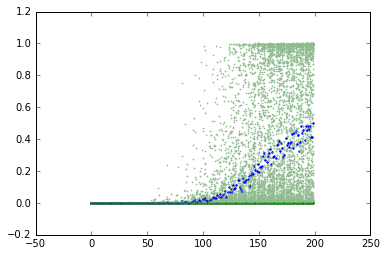

In [361]:

fcdrop_prob_mc = np.load('./exps/exp1/results/slowfp_fballdrop_prob.npy')
nodrop_prob = np.load('./exps/exp1/results/slowfp_fbnodrop_prob.npy')
fcdrop_prob_mc = fcdrop_prob_mc[0,None]

print yt
print fcdrop_prob_mc.shape


img_idx = 0
tr_idx = 5 

print 'Yoda'
#label_idx = yt_adv[img_idx] 
for i in xrange(200):
        plt.scatter(i*np.ones(fcdrop_prob_mc.shape[2]),fcdrop_prob_mc[img_idx,i,:,tr_idx],color ='#8FBC8F', s=0.5)
        m = np.mean(fcdrop_prob_mc[img_idx,i,:,tr_idx])
        plt.scatter(i,m,color='b',s=2)
        plt.scatter(i,nodrop_prob[img_idx,i,tr_idx],color='g',s=2)

savefig('iter_.png', bbox_inches='tight')


In [344]:
prob_1 = np.load('./exps/exp1/results/fastfp_fballdrop_prob.npy')
prob_2 = np.load('./exps/exp1/results/fastfp_fbfcdrop_prob.npy')
prob_3 = np.load('./exps/exp1/results/fastfp_fbnodrop_prob.npy')

In [359]:
np.mean(prob_1[0,1,:,8])

0.32668222386119394

[8]
(1, 200, 100, 10)
Yoda
[8]
(1, 200, 100, 10)
Yoda
[8]
(1, 200, 100, 10)
Yoda
[8]
(1, 200, 100, 10)
Yoda


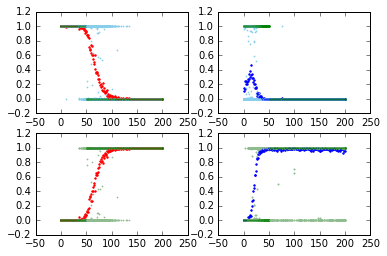

In [405]:
plt.hold(True)
plt.subplot(2,2,1)

fcdrop_prob_mc = np.load('./exps/exp1/results/n_fp_fbfcdrop_prob.npy')
nodrop_prob = np.load('./exps/exp1/results/n_fp_fbnodrop_prob.npy')
fcdrop_prob_mc = fcdrop_prob_mc[0,None]

print yt
print fcdrop_prob_mc.shape


img_idx = 0
tr_idx = 6 

print 'Yoda'
#label_idx = yt_adv[img_idx] 
for i in xrange(200):
        plt.scatter(i*np.ones(fcdrop_prob_mc.shape[2]),fcdrop_prob_mc[img_idx,i,:,tr_idx],color ='#87CEEB', s=0.5)
        m = np.mean(fcdrop_prob_mc[img_idx,i,:,tr_idx])
        plt.scatter(i,m,color='r',s=2)
        plt.scatter(i,nodrop_prob[img_idx,i,tr_idx],color='g',s=2)
        

        
plt.subplot(2,2,2)

fcdrop_prob_mc = np.load('./exps/exp1/results/n_fp_fballdrop_prob.npy')
nodrop_prob = np.load('./exps/exp1/results/n_fp_fbnodrop_prob.npy')
fcdrop_prob_mc = fcdrop_prob_mc[0,None]

print yt
print fcdrop_prob_mc.shape


img_idx = 0
tr_idx = 6 

print 'Yoda'
#label_idx = yt_adv[img_idx] 
for i in xrange(200):
        plt.scatter(i*np.ones(fcdrop_prob_mc.shape[2]),fcdrop_prob_mc[img_idx,i,:,tr_idx],color ='#87CEEB', s=0.5)
        m = np.mean(fcdrop_prob_mc[img_idx,i,:,tr_idx])
        plt.scatter(i,m,color='b',s=2)
        plt.scatter(i,nodrop_prob[img_idx,i,tr_idx],color='g',s=2)

plt.subplot(2,2,3)

fcdrop_prob_mc = np.load('./exps/exp1/results/n_fp_fbfcdrop_prob.npy')
nodrop_prob = np.load('./exps/exp1/results/n_fp_fbnodrop_prob.npy')
fcdrop_prob_mc = fcdrop_prob_mc[0,None]

print yt
print fcdrop_prob_mc.shape


img_idx = 0
tr_idx = 9

print 'Yoda'
#label_idx = yt_adv[img_idx] 
for i in xrange(200):
        plt.scatter(i*np.ones(fcdrop_prob_mc.shape[2]),fcdrop_prob_mc[img_idx,i,:,tr_idx],color ='#8FBC8F', s=0.5)
        m = np.mean(fcdrop_prob_mc[img_idx,i,:,tr_idx])
        plt.scatter(i,m,color='r',s=2)
        plt.scatter(i,nodrop_prob[img_idx,i,tr_idx],color='g',s=2)
        


plt.subplot(2,2,4)

fcdrop_prob_mc = np.load('./exps/exp1/results/n_fp_fballdrop_prob.npy')
nodrop_prob = np.load('./exps/exp1/results/n_fp_fbnodrop_prob.npy')
fcdrop_prob_mc = fcdrop_prob_mc[0,None]

print yt
print fcdrop_prob_mc.shape


img_idx = 0
tr_idx = 9 

print 'Yoda'
#label_idx = yt_adv[img_idx] 
for i in xrange(200):
        plt.scatter(i*np.ones(fcdrop_prob_mc.shape[2]),fcdrop_prob_mc[img_idx,i,:,tr_idx],color ='#8FBC8F', s=1.0)
        m = np.mean(fcdrop_prob_mc[img_idx,i,:,tr_idx])
        plt.scatter(i,m,color='b',s=2)
        plt.scatter(i,nodrop_prob[img_idx,i,tr_idx],color='g',s=2)
        
#noise : 0.09
savefig('iter_noise1.png', bbox_inches='tight')


[8]
(1, 200, 100, 10)
Yoda
[8]
(1, 200, 100, 10)
Yoda
[8]
(1, 200, 100, 10)
Yoda
[8]
(1, 200, 100, 10)
Yoda


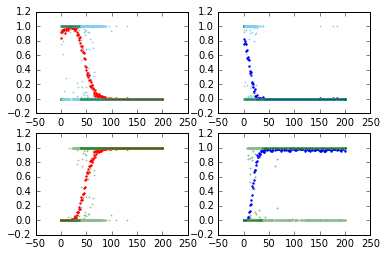

In [377]:
plt.hold(True)
plt.subplot(2,2,1)

fcdrop_prob_mc = np.load('./exps/exp1/results/n2_fp_fbfcdrop_prob.npy')
nodrop_prob = np.load('./exps/exp1/results/n2_fp_fbnodrop_prob.npy')
fcdrop_prob_mc = fcdrop_prob_mc[0,None]

print yt
print fcdrop_prob_mc.shape


img_idx = 0
tr_idx = 6 

print 'Yoda'
#label_idx = yt_adv[img_idx] 
for i in xrange(200):
        plt.scatter(i*np.ones(fcdrop_prob_mc.shape[2]),fcdrop_prob_mc[img_idx,i,:,tr_idx],color ='#87CEEB', s=0.5)
        m = np.mean(fcdrop_prob_mc[img_idx,i,:,tr_idx])
        plt.scatter(i,m,color='r',s=2)
        plt.scatter(i,nodrop_prob[img_idx,i,tr_idx],color='g',s=2)
        

        
plt.subplot(2,2,2)

fcdrop_prob_mc = np.load('./exps/exp1/results/n2_fp_fballdrop_prob.npy')
nodrop_prob = np.load('./exps/exp1/results/n2_fp_fbnodrop_prob.npy')
fcdrop_prob_mc = fcdrop_prob_mc[0,None]

print yt
print fcdrop_prob_mc.shape


img_idx = 0
tr_idx = 2 

print 'Yoda'
#label_idx = yt_adv[img_idx] 
for i in xrange(200):
        plt.scatter(i*np.ones(fcdrop_prob_mc.shape[2]),fcdrop_prob_mc[img_idx,i,:,tr_idx],color ='#87CEEB', s=0.5)
        m = np.mean(fcdrop_prob_mc[img_idx,i,:,tr_idx])
        plt.scatter(i,m,color='b',s=2)
        plt.scatter(i,nodrop_prob[img_idx,i,tr_idx],color='g',s=2)

plt.subplot(2,2,3)

fcdrop_prob_mc = np.load('./exps/exp1/results/n2_fp_fbfcdrop_prob.npy')
nodrop_prob = np.load('./exps/exp1/results/n2_fp_fbnodrop_prob.npy')
fcdrop_prob_mc = fcdrop_prob_mc[0,None]

print yt
print fcdrop_prob_mc.shape


img_idx = 0
tr_idx = 9

print 'Yoda'
#label_idx = yt_adv[img_idx] 
for i in xrange(200):
        plt.scatter(i*np.ones(fcdrop_prob_mc.shape[2]),fcdrop_prob_mc[img_idx,i,:,tr_idx],color ='#8FBC8F', s=0.5)
        m = np.mean(fcdrop_prob_mc[img_idx,i,:,tr_idx])
        plt.scatter(i,m,color='r',s=2)
        plt.scatter(i,nodrop_prob[img_idx,i,tr_idx],color='g',s=2)
        


plt.subplot(2,2,4)

fcdrop_prob_mc = np.load('./exps/exp1/results/n2_fp_fballdrop_prob.npy')
nodrop_prob = np.load('./exps/exp1/results/n2_fp_fbnodrop_prob.npy')
fcdrop_prob_mc = fcdrop_prob_mc[0,None]

print yt
print fcdrop_prob_mc.shape


img_idx = 0
tr_idx = 9 

print 'Yoda'
#label_idx = yt_adv[img_idx] 
for i in xrange(200):
        plt.scatter(i*np.ones(fcdrop_prob_mc.shape[2]),fcdrop_prob_mc[img_idx,i,:,tr_idx],color ='#8FBC8F', s=1.0)
        m = np.mean(fcdrop_prob_mc[img_idx,i,:,tr_idx])
        plt.scatter(i,m,color='b',s=2)
        plt.scatter(i,nodrop_prob[img_idx,i,tr_idx],color='g',s=2)
        
#noise : 0.09
savefig('iter_noise3.png', bbox_inches='tight')

[8]
(1, 200, 100, 10)
Yoda
[8]
(1, 200, 100, 10)
Yoda
[8]
(1, 200, 100, 10)
Yoda
[8]
(1, 200, 100, 10)
Yoda


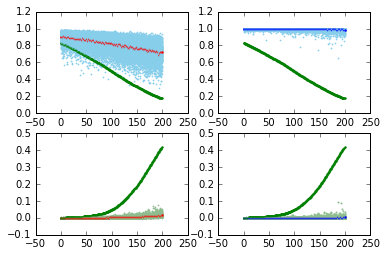

In [376]:
plt.hold(True)
plt.subplot(2,2,1)

fcdrop_prob_mc = np.load('./exps/exp1/results/n3_fp_fbfcdrop_prob.npy')
nodrop_prob = np.load('./exps/exp1/results/n3_fp_fbnodrop_prob.npy')
fcdrop_prob_mc = fcdrop_prob_mc[0,None]

print yt
print fcdrop_prob_mc.shape


img_idx = 0
tr_idx = 4

print 'Yoda'
#label_idx = yt_adv[img_idx] 
for i in xrange(200):
        plt.scatter(i*np.ones(fcdrop_prob_mc.shape[2]),fcdrop_prob_mc[img_idx,i,:,tr_idx],color ='#87CEEB', s=0.5)
        m = np.mean(fcdrop_prob_mc[img_idx,i,:,tr_idx])
        plt.scatter(i,m,color='r',s=2)
        plt.scatter(i,nodrop_prob[img_idx,i,tr_idx],color='g',s=2)
        

        
plt.subplot(2,2,2)

fcdrop_prob_mc = np.load('./exps/exp1/results/n3_fp_fballdrop_prob.npy')
nodrop_prob = np.load('./exps/exp1/results/n3_fp_fbnodrop_prob.npy')
fcdrop_prob_mc = fcdrop_prob_mc[0,None]

print yt
print fcdrop_prob_mc.shape


img_idx = 0
tr_idx = 4 

print 'Yoda'
#label_idx = yt_adv[img_idx] 
for i in xrange(200):
        plt.scatter(i*np.ones(fcdrop_prob_mc.shape[2]),fcdrop_prob_mc[img_idx,i,:,tr_idx],color ='#87CEEB', s=0.5)
        m = np.mean(fcdrop_prob_mc[img_idx,i,:,tr_idx])
        plt.scatter(i,m,color='b',s=2)
        plt.scatter(i,nodrop_prob[img_idx,i,tr_idx],color='g',s=2)

plt.subplot(2,2,3)

fcdrop_prob_mc = np.load('./exps/exp1/results/n3_fp_fbfcdrop_prob.npy')
nodrop_prob = np.load('./exps/exp1/results/n3_fp_fbnodrop_prob.npy')
fcdrop_prob_mc = fcdrop_prob_mc[0,None]

print yt
print fcdrop_prob_mc.shape


img_idx = 0
tr_idx = 9

print 'Yoda'
#label_idx = yt_adv[img_idx] 
for i in xrange(200):
        plt.scatter(i*np.ones(fcdrop_prob_mc.shape[2]),fcdrop_prob_mc[img_idx,i,:,tr_idx],color ='#8FBC8F', s=0.5)
        m = np.mean(fcdrop_prob_mc[img_idx,i,:,tr_idx])
        plt.scatter(i,m,color='r',s=2)
        plt.scatter(i,nodrop_prob[img_idx,i,tr_idx],color='g',s=2)
        


plt.subplot(2,2,4)

fcdrop_prob_mc = np.load('./exps/exp1/results/n3_fp_fballdrop_prob.npy')
nodrop_prob = np.load('./exps/exp1/results/n3_fp_fbnodrop_prob.npy')
fcdrop_prob_mc = fcdrop_prob_mc[0,None]

print yt
print fcdrop_prob_mc.shape


img_idx = 0
tr_idx = 9 

print 'Yoda'
#label_idx = yt_adv[img_idx] 
for i in xrange(200):
        plt.scatter(i*np.ones(fcdrop_prob_mc.shape[2]),fcdrop_prob_mc[img_idx,i,:,tr_idx],color ='#8FBC8F', s=1.0)
        m = np.mean(fcdrop_prob_mc[img_idx,i,:,tr_idx])
        plt.scatter(i,m,color='b',s=2)
        plt.scatter(i,nodrop_prob[img_idx,i,tr_idx],color='g',s=2)
        
#noise : 0.09
savefig('iter_noise4.png', bbox_inches='tight')

[8]
(1, 200, 100, 10)
Yoda


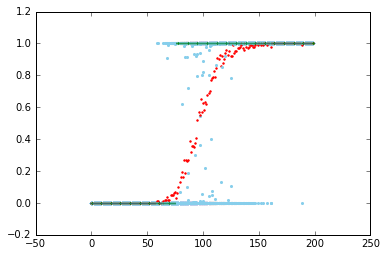

In [387]:

fcdrop_prob_mc = np.load('./exps/exp1/results/n5_fp_fbfcdrop_prob.npy')
nodrop_prob = np.load('./exps/exp1/results/n5_fp_fbnodrop_prob.npy')
fcdrop_prob_mc = fcdrop_prob_mc[0,None]

print yt
print fcdrop_prob_mc.shape


img_idx = 0
tr_idx = 9

print 'Yoda'
#label_idx = yt_adv[img_idx] 
for i in xrange(200):
        plt.scatter(i*np.ones(fcdrop_prob_mc.shape[2]),fcdrop_prob_mc[img_idx,i,:,tr_idx],color ='#87CEEB', s=4.2)
        m = np.mean(fcdrop_prob_mc[img_idx,i,:,tr_idx])
        plt.scatter(i,m,color='r',s=2)
        plt.scatter(i,nodrop_prob[img_idx,i,tr_idx],color='g',s=2)
        

savefig('slow_noise2.png', bbox_inches='tight')


[8]
(1, 200, 100, 10)
Yoda


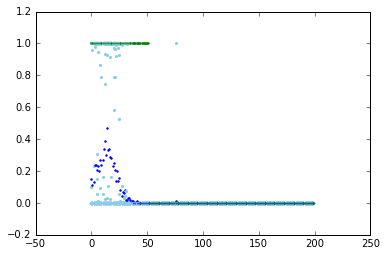

In [404]:

fcdrop_prob_mc = np.load('./exps/exp1/results/n_fp_fballdrop_prob.npy')
nodrop_prob = np.load('./exps/exp1/results/n_fp_fbnodrop_prob.npy')
fcdrop_prob_mc = fcdrop_prob_mc[0,None]

print yt
print fcdrop_prob_mc.shape


img_idx = 0
tr_idx = 6

print 'Yoda'
#label_idx = yt_adv[img_idx] 
for i in xrange(200):
        plt.scatter(i*np.ones(fcdrop_prob_mc.shape[2]),fcdrop_prob_mc[img_idx,i,:,tr_idx],color ='#87CEEB', s=4.2)
        m = np.mean(fcdrop_prob_mc[img_idx,i,:,tr_idx])
        plt.scatter(i,m,color='b',s=2)
        plt.scatter(i,nodrop_prob[img_idx,i,tr_idx],color='g',s=2)
        
#noise : 0.09
savefig('slow_noise3.png', bbox_inches='tight')

In [392]:
img_adv = np.load('./exps/exp1/results/n_fp_fbimg_adv.npy')
print img_adv.shape
img_adv = img_adv[0]
print img_adv.shape
grid = np.zeros((3,10*32,10*32))
print grid.shape
for i in xrange(100):
    r = i/10
    c = i%10
    r_p = np.array([x for x in xrange(r*32,(r+1)*32)])
    c_p = np.array([y for y in xrange(c*32,(c+1)*32)])
    for x,ix in zip(r_p,np.arange(32)):
        for y,iy in zip(c_p,np.arange(32)):
            grid[:,x,y] = img_adv[i,:,ix,iy]
            

scipy.misc.imsave('noise.jpg',np.rot90(grid.T,k=3))

(1, 200, 3, 32, 32)
(200, 3, 32, 32)
(3, 320, 320)
